In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize
from __future__ import division #Time travelling to the future to get a non-idiotic way of doing division

**Problem 1**

In this problem, we begin what I'm going to call equation 1: $\frac{\ddot{a}}{a} = -\frac{4 \pi G}{3 c^2} (\epsilon + 3 P)$ and equation 2: $(\frac{\dot{a}}{a})^2 = \frac{8 \pi G \epsilon}{3 c^2} - \frac{\kappa c^2}{a}$

To begin, we multiply the second equation by a, yielding: $\dot{a}^2 = \frac{8 \pi G \epsilon a^2}{3 c^2} - \kappa c^2$

And take a derivative with respect to time: $2 \dot{a}\ddot{a} = \frac{8 \pi G}{3 c^2} (\dot{\epsilon} a^2 + 2 \epsilon \dot{a} a)$

Rearranging, we can get: $\frac{\ddot{a}}{a} = \frac{4 \pi G}{3 c^2} (\dot{\epsilon} \frac{a}{\dot{a}} + 2 \epsilon)$

We can then substitute in equation 1 to get: $-\frac{4 \pi G}{3 c^2} (\epsilon + 3 P) = \frac{4 \pi G}{3 c^2} (\dot{\epsilon} \frac{a}{\dot{a}} + 2 \epsilon)$

Cancel the constants out front to get: $-\epsilon - 3 P = \dot{\epsilon} \frac{a}{\dot{a}} + 2 \epsilon$

Which can be nicely rearranged to get: $\dot{\epsilon} \frac{a}{\dot{a}} + 3 \epsilon + 3 P = 0$

Followed by factoring to produce the final equation: $\dot{\epsilon} + \frac{3 \dot{a}}{a} (\epsilon + P) = 0$

**Problem 2**

The problems ask for us to solve for co-moving distances and ages of the universe from z=0 to z=10. This distance is given by: $r = \int_{0}^{z} \frac{c dZ}{H(Z)}$ and age by: $ t = \int_{0}^{z} \frac{dZ}{(1+z)H(z)}$.

From the problem then: $ (\frac{H(z)}{H_0})^2 = \Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0} + (1- \Omega_0)(1+z)^2$

This can be quickly manipulated to become: $\frac{1}{H(z)} = \frac{1}{H_0 * \sqrt{\Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0} + (1- \Omega_0)(1+z)^2}}$

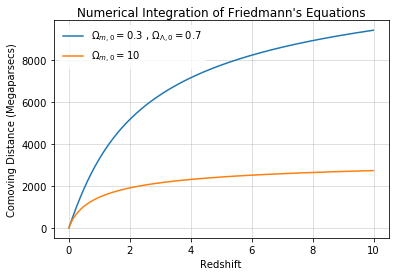

In [2]:
div = 100 #Sets the fine-ness of our plot
necessary_constants_to_get_right_answer_1 = 3e5 / 70

distance_a = np.zeros(shape=(10*div,2))
distance_b = np.zeros(shape=(10*div,2))

def friedmann_distance(z, O_r , O_m , O_lam):
    O_tot = O_r + O_m + O_lam  
    return (necessary_constants_to_get_right_answer_1) / ((O_r*(1+z)**4 + O_m*(1+z)**3 + O_lam + (1-O_tot)*(1+z)**2)**(1/2))

for z in range(0,10*div):
    distance_a[z,0] = z/div
    distance_a[z,1] = quad(friedmann_distance,0,z/div, args=(0,0.3,0.7))[0]
    distance_b[z,0] = z/div
    distance_b[z,1] = quad(friedmann_distance,0,z/div, args=(0,10,0))[0]


plt.plot(distance_a[:,0], distance_a[:,1], label = "$\Omega_{m,0}=0.3$ , $\Omega_{\Lambda,0}=0.7$")
plt.plot(distance_b[:,0], distance_b[:,1], label = "$\Omega_{m,0}=10$")
plt.xlabel("Redshift")
plt.ylabel("Comoving Distance (Megaparsecs)")
plt.title("Numerical Integration of Friedmann's Equations")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

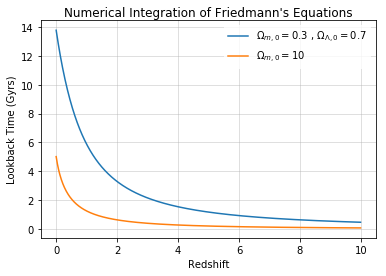

In [19]:
necessary_constants_to_get_right_answer_2 = 1000 / 70
really_big_huge_redshift = 10000
time_a = np.zeros(shape=(10*div,2))
time_b = np.zeros(shape=(10*div,2))

Canonical_age = quad(friedmann_time,0,really_big_huge_redshift, args=(0,0.3,0.7))[0]
Radiation_age = quad(friedmann_time,0,really_big_huge_redshift, args=(0,10,0))[0]

def friedmann_time(z, O_r , O_m , O_lam):
    O_tot = O_r + O_m + O_lam  
    return (necessary_constants_to_get_right_answer_2) / ((1+z)*(O_r*(1+z)**4 + O_m*(1+z)**3 + O_lam + (1-O_tot)*(1+z)**2)**(1/2))

for z in range(0,10*div):
    time_a[z,0] = z/div
    time_a[z,1] = quad(friedmann_time,0,z/div, args=(0,0.3,0.7))[0]
    time_b[z,0] = z/div
    time_b[z,1] = quad(friedmann_time,0,z/div, args=(0,10,0))[0]


plt.plot(time_a[:,0], Canonical_age - time_a[:,1], label = "$\Omega_{m,0}=0.3$ , $\Omega_{\Lambda,0}=0.7$")
plt.plot(time_b[:,0], Radiation_age - time_b[:,1], label = "$\Omega_{m,0}=10$")
plt.xlabel("Redshift")
plt.ylabel("Lookback Time (Gyrs)")
plt.title("Numerical Integration of Friedmann's Equations")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

**Question 3**

To find the age of the universe, we select a very high redshift and calculate the lookback time. Above, I do this using our canonical universe which gives a result of approximately 13.77. I then define a function that returns the difference in age between our canonical universe and a radiation-only one with a given $\Omega_r$. I then minimize this function using the magic of scipy.optimize.minimize. The result is $\bf{\Omega_r = 0.00138669}$. I then verify this by checking the age by hand.

In [16]:
def error_function(testval):
    return np.absolute(Canonical_age - quad(friedmann_time,0,really_big_huge_redshift, args=(testval,0,0))[0])

print minimize(error_function, 10, method="SLSQP", bounds=[(0,1e15)]),"\n"
print quad(friedmann_time,0,really_big_huge_redshift, args=(0.00138669,0,0))[0], Canonical_age

  status: 0
 success: True
    njev: 17
    nfev: 70
     fun: 4.079225703890188e-06
       x: array([ 0.00138669])
 message: 'Optimization terminated successfully.'
     jac: array([ 178.27269578,    0.        ])
     nit: 17 

13.7728354989 13.7728309237
